In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Исходные данные
hypotheses = {
    'H1': {'name': 'Грипп', 'P(H)': 0.3},
    'H2': {'name': 'Простуда', 'P(H)': 0.4},
    'H3': {'name': 'Аллергия', 'P(H)': 0.2},
    'H4': {'name': 'COVID-19', 'P(H)': 0.1}
}

evidence = {
    'E1': {'name': 'Высокая температура', 'P(E/H1)': 0.9, 'P(E/not H1)': 0.2},
    'E2': {'name': 'Кашель', 'P(E/H1)': 0.8, 'P(E/not H1)': 0.3},
    'E3': {'name': 'Насморк', 'P(E/H2)': 0.7, 'P(E/not H2)': 0.4},
    'E4': {'name': 'Головная боль', 'P(E/H3)': 0.5, 'P(E/not H3)': 0.6},
    'E5': {'name': 'Потеря обоняния', 'P(E/H4)': 0.9, 'P(E/not H4)': 0.1}
}

# Функция для расчета апостериорной вероятности

Результаты изменений вероятностей гипотез:
Грипп: [0.8372093023255814, 0.8372093023255814, 0.8372093023255814]
Простуда: [0.5384615384615384, 0.5384615384615384, 0.5384615384615384]
Аллергия: [0.2, 0.1724137931034483, 0.1724137931034483]
COVID-19: [0.1, 0.1, 0.5]


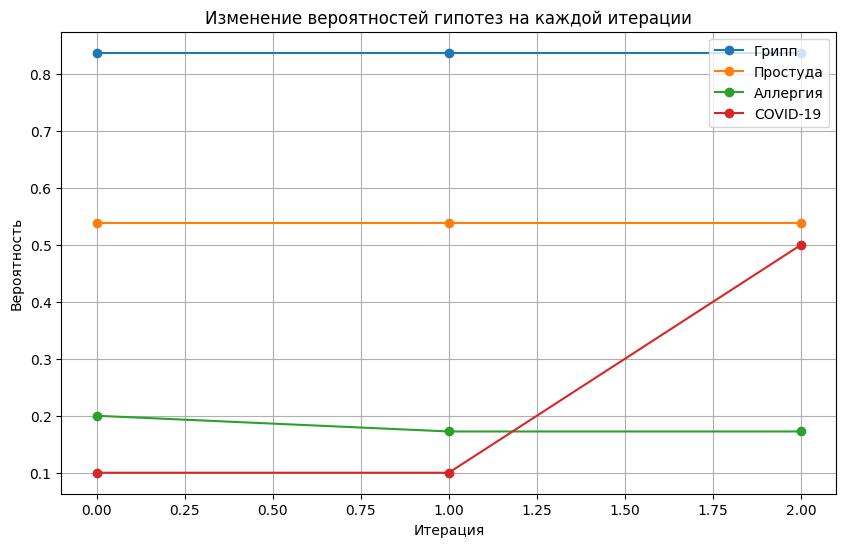

In [5]:
def bayes_theorem(P_H, P_E_given_H, P_E_given_not_H):
    return (P_E_given_H * P_H) / (P_E_given_H * P_H + P_E_given_not_H * (1 - P_H))

# Итерации (последовательное применение свидетельств)
iterations = [
    ['E1', 'E2', 'E3'],  # Первая итерация
    ['E1', 'E2', 'E3', 'E4'],  # Вторая итерация
    ['E1', 'E2', 'E3', 'E4', 'E5']  # Третья итерация
]

# Словарь для хранения вероятностей на каждой итерации
results = {h: [] for h in hypotheses}
# Основной цикл для итераций
for iteration in iterations:
    for h in hypotheses:
        P_H = hypotheses[h]['P(H)']
        for e in iteration:
            if e in evidence:
                P_E_given_H = evidence[e].get(f'P(E/{h})', 0)
                P_E_given_not_H = evidence[e].get(f'P(E/not {h})', 0)
                if P_E_given_H != 0 and P_E_given_not_H != 0:
                    P_H = bayes_theorem(P_H, P_E_given_H, P_E_given_not_H)
        results[h].append(P_H)

# Вывод результатов
print("Результаты изменений вероятностей гипотез:")
for h in results:
    print(f"{hypotheses[h]['name']}: {results[h]}")

# Построение графиков
plt.figure(figsize=(10, 6))
for h in results:
    plt.plot(results[h], label=hypotheses[h]['name'], marker='o')

plt.title('Изменение вероятностей гипотез на каждой итерации')
plt.xlabel('Итерация')
plt.ylabel('Вероятность')
plt.legend()
plt.grid(True)
plt.show()
